In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [120]:
import seaborn as sns

In [121]:
train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')

In [122]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [123]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [124]:
big_df = train_df.append(test_df, sort = False)

In [125]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [126]:
big_df.shape

(13354, 11)

#### Data analysis and Feature Engineering

In [127]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [128]:
big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year'] = big_df['Date_of_Journey'].str.split('/').str[2]

In [129]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [130]:
big_df.drop('Date_of_Journey', axis = 1, inplace = True)

In [131]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  object 
 11  Month            13354 non-null  object 
 12  Year             13354 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


In [132]:
#Convert into integer datatype
big_df['Date'] = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year'] = big_df['Year'].astype(int)

In [133]:
big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]

In [134]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [135]:
big_df.Total_Stops.isnull().sum()

1

In [136]:
big_df['Total_Stops']  = big_df['Total_Stops'].fillna('1 stops')

In [137]:
big_df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '1 stops', '4 stops'],
      dtype=object)

In [138]:
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop','0 stops')

In [139]:
big_df['Total_Stops'] = big_df['Total_Stops'].str.split(' ').str[0]

In [140]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [141]:
big_df['Total_Stops'] = big_df.Total_Stops.astype(int)

In [142]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13354 non-null  int32  
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
dtypes: float64(1), int32(4), object(8)
memory usage: 1.2+ MB


In [143]:
big_df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [144]:
3 * 48 + 40 + 22 *3 + 45 *2 + 72

412

In [145]:
big_df['Arrival_Hours'] = big_df['Arrival_Time'].str.split(':').str[0]
big_df['Arrival_Minutes'] = big_df['Arrival_Time'].str.split(':').str[1]

In [146]:
big_df['Arrival_Hours'] = big_df['Arrival_Hours'].astype(int)
big_df['Arrival_Minutes'] = big_df['Arrival_Minutes'].astype(int)

In [147]:
big_df.drop('Arrival_Time', axis = 1, inplace = True)

In [148]:
big_df.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
2 Long layover                      1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [149]:
big_df['Departure_Hours'] = big_df['Dep_Time'].str.split(':').str[0]
big_df['Departure_Minutes'] = big_df['Dep_Time'].str.split(':').str[1]

big_df['Departure_Hours'] = big_df['Departure_Hours'].astype(int)
big_df['Departure_Minutes'] = big_df['Departure_Minutes'].astype(int)

In [150]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [151]:
big_df.drop('Dep_Time', axis = 1, inplace = True)

In [152]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13354 non-null  object 
 1   Source             13354 non-null  object 
 2   Destination        13354 non-null  object 
 3   Route              13353 non-null  object 
 4   Duration           13354 non-null  object 
 5   Total_Stops        13354 non-null  int32  
 6   Additional_Info    13354 non-null  object 
 7   Price              10683 non-null  float64
 8   Date               13354 non-null  int32  
 9   Month              13354 non-null  int32  
 10  Year               13354 non-null  int32  
 11  Arrival_Hours      13354 non-null  int32  
 12  Arrival_Minutes    13354 non-null  int32  
 13  Departure_Hours    13354 non-null  int32  
 14  Departure_Minutes  13354 non-null  int32  
dtypes: float64(1), int32(8), object(6)
memory usage: 1.2+ MB


In [153]:
big_df['Duration_Hours'] = big_df['Duration'].str.split(' ').str[0]
big_df['Duration_Minutes'] = big_df['Duration'].str.split(' ').str[1]

In [154]:
# big_df.drop('DUration_Minutes', axis = 1, inplace = True)

In [155]:
big_df['Duration_Hours'] = big_df['Duration_Hours'].str.split('h').str[0]

In [156]:
big_df['Duration_Minutes'] = big_df['Duration_Minutes'].str.split('m').str[0]

In [157]:
big_df['Duration_Minutes'] = big_df['Duration_Minutes'].fillna(0)

In [158]:
big_df.drop('Duration', axis = 1, inplace = True)

In [159]:
big_df['Duration_Hours'] = big_df['Duration_Hours'].replace('5m', '5')

In [160]:
big_df['Duration_Hours'] = big_df['Duration_Hours'].astype(int)
big_df['Duration_Minutes'] = big_df['Duration_Minutes'].astype(int)

In [161]:
big_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


c:\rishav_python\virtual1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

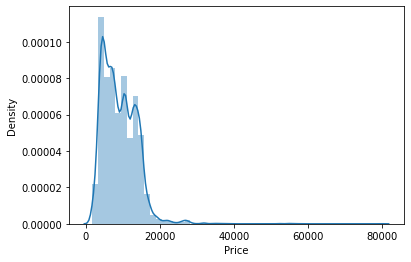

In [162]:
sns.distplot(big_df['Price'])

In [163]:
# Replacing it with the mean of all the prices
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

#### Handling Route

In [52]:
big_df['Route_1']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_2']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_3']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_4']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_5']=big_df['Route'].str.split('→ ').str[4]

In [53]:
big_df['Route_1'].fillna("None",inplace=True)
big_df['Route_2'].fillna("None",inplace=True)
big_df['Route_3'].fillna("None",inplace=True)
big_df['Route_4'].fillna("None",inplace=True)
big_df['Route_5'].fillna("None",inplace=True)

In [164]:
big_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [165]:
big_df=big_df.drop(['Route'],axis=1)

In [166]:
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [167]:
# Lets see the missing values
big_df.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
Price                0
Date                 0
Month                0
Year                 0
Arrival_Hours        0
Arrival_Minutes      0
Departure_Hours      0
Departure_Minutes    0
Duration_Hours       0
Duration_Minutes     0
dtype: int64

#### By converting it into labels we would easily be able to relate it with the price. Eg- The direct flight will have less no. of stops and hence more price. The model would easily be able to relate with it

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
# big_df["Airline"]=encoder.fit_transform(big_df['Airline'])
# big_df["Source"]=encoder.fit_transform(big_df['Source'])
# big_df["Destination"]=encoder.fit_transform(big_df['Destination'])
# big_df["Additional_Info"]=encoder.fit_transform(big_df['Additional_Info'])
big_df["Route_1"]=encoder.fit_transform(big_df['Route_1'])
big_df["Route_2"]=encoder.fit_transform(big_df['Route_2'])
big_df["Route_3"]=encoder.fit_transform(big_df['Route_3'])
big_df["Route_4"]=encoder.fit_transform(big_df['Route_4'])
big_df["Route_5"]=encoder.fit_transform(big_df['Route_5'])

In [115]:
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_Hours,Duration_Minutes
0,0,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,1,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,0,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,0,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,0,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [168]:
Airline = pd.get_dummies(big_df['Airline'], drop_first= True)

In [172]:
Airline.head()
big_df = pd.concat([big_df, Airline], axis= 1)

In [175]:
big_df.head()

,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,...,0,1,0,0,0,0,0,0,0,0


In [174]:
big_df.drop('Airline', axis = 1, inplace= True)

In [176]:
Source = pd.get_dummies(big_df['Source'], drop_first= True)
Destination = pd.get_dummies(big_df['Destination'], drop_first= True)

In [177]:
big_df = pd.concat([big_df, Source, Destination], axis= 1)

In [178]:
big_df.head()

,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Minutes,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,...,0,0,0,1,0,0,0,0,0,0
2,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,...,0,0,1,0,0,1,0,0,0,0
3,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,...,0,0,0,1,0,0,0,0,0,0
4,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,...,0,0,0,0,0,0,0,0,0,1


In [179]:
big_df.drop(['Source', 'Destination'], axis = 1, inplace= True)

In [180]:
big_df.head()

,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,No info,3897.0,24,3,2019,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,2,No info,7662.0,1,5,2019,13,15,5,50,...,0,0,0,1,0,0,0,0,0,0
2,2,No info,13882.0,9,6,2019,4,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,1,No info,6218.0,12,5,2019,23,30,18,5,...,0,0,0,1,0,0,0,0,0,0
4,1,No info,13302.0,1,3,2019,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1


In [181]:
big_df.drop(['Additional_Info'], axis = 1, inplace= True)

In [182]:
big_df.head()

,Total_Stops,Price,Date,Month,Year,Arrival_Hours,Arrival_Minutes,Departure_Hours,Departure_Minutes,Duration_Hours,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897.0,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,5,2019,13,15,5,50,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882.0,9,6,2019,4,25,9,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218.0,12,5,2019,23,30,18,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302.0,1,3,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,0,1


In [184]:
big_df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Arrival_Hours',
       'Arrival_Minutes', 'Departure_Hours', 'Departure_Minutes',
       'Duration_Hours', 'Duration_Minutes', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [186]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()